TODOs
- [x] include some callback functionality from fastai
- [ ] add further resources 
- [ ] decide on appendix content
- [ ] check consistency of deep learning vs deep-learning
- [ ] check all headings make sense
- [ ] check that headings are at a suitable level 
- [ ] make sure images use the PH syntax 
- [ ] use of back ticks \`\` is consistent

---
title: YOUR TITLE HERE
collection: lessons
layout: lesson
slug: LEAVE BLANK
date: LEAVE BLANK
translation_date: LEAVE BLANK
authors:
- FORENAME SURNAME 1
- FORENAME SURNAME 2, etc
reviewers:
- LEAVE BLANK
editors:
- LEAVE BLANK
translator:
- FORENAME SURNAME 1
- FORENAME SURNAME 2, etc
translation-editor:
- LEAVE BLANK
translation-reviewer:
- LEAVE BLANK
original: LEAVE BLANK
review-ticket: LEAVE BLANK
difficulty: LEAVE BLANK
activity: LEAVE BLANK
topics: LEAVE BLANK
abstract: LEAVE BLANK
---

{% include toc.html %}

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# An introduction to Computer Vision using Deep Learning 
!todo choose a title

## Lesson goals

!todo finalize lesson goals

This lesson aims to:
- provide an introduction to why you may use deep learning based computer vision methods for humanities research 
- give an overview of the steps involved in training a deep learning model
- discuss the particular nuances of using these methods for humanities research
- help you decide whether deep learning might be a useful tool for you

This lesson doesn't aim to:
- reproduce a generic introduction to deep learning 
- cover all the details of deep learning and computer vision
- make you an expert in deep learning

## Suggested Prior Skills

- Some familiarity with Python or another programming language will be helpful for following the lesson fully. If you are not familiar with Python it may be useful to follow the Programming Historian [lessons](https://programminghistorian.org/en/lessons/?topic=python) on Python before starting this lesson. 
- Some familiarity with using [Jupyter Notebooks](https://jupyter.org/try) will also be advantageous.If you are unfamiliar with notebooks you may find the [Introduction to Jupyter Notebooks](https://programminghistorian.org/en/lessons/jupyter-notebooks) a helpful resource in conjunction with this lesson. 
- There is some use of other external Python libraries in this tutorial but previous knowledge of these libraries isn't necessary. The steps involved in using these libraries will be explained as they are used. 

## Introduction: why use deep learning for computer vision in the humanities?
!todo
- what it can do 
- why you might want to do it 
- Historical application
- working at scale
- previous works
- some intro to concerns/challenges?


## Setup instructions

Why a GPU?

? Put in appendix?
### Kaggle (preferred option) 
- sign up for a kaggle account 
- go to !todo add link 
- Kaggle notebook has been setup to provide data/correct python instalation + some free GPU allocation 
- you can fork your notebook to make changes etc. 

### Colab (supported)
- Google account required 
- Overview of Google Colab features [https://colab.research.google.com/notebooks/basic_features_overview.ipynb]
- One additional cells at top of colab nb with pinned pip installs and data download/setup 

### alternative cloud setups (not supported) 
- brief instructions of the environment setup required with conda + nvidia gpu
- can't support all of the various cloud offerings but some help can be found here
- git clone repo will contain all the data !todo double check this + 

### Local setup 
- Conda environment 
- git clone repo will contain all the data !todo double check this + 

## How this lesson is organised

This structure of this lesson may follow a different order to what you expect. Instead of starting from the 'ground up', this lesson starts from practical applications of the whole deep learning pipeline before drilling down into more detail of *parts* of this pipeline. This is done for a number of reasons:

- when starting with the fundamentals it can be hard to understand how the different pieces of a topic fit together, and which are most important to understand for practical applications

- there is the danger of '[“learning about” something at the expense of actually learning it'](https://www.gse.harvard.edu/news/uk/09/01/education-bat-seven-principles-educators), although there is a theoretical component to this lesson, we want to get you started in using deep learning based methods. 

- you might want to use deep learning as a tool that supports your work but doesn't underpin research findings directly, arguably this may justify a lower investment in knowing all the details of how a tool works. [^1]

Instead of covering every detail, this lesson focuses on the most important things to be aware of and control when you are getting started. Since the aim of this lesson is to focus on using computer vision with humanities applications in mind, we focus on questions of particular importance to humanities *applications* of these methods. 
There may be a need to go beyond this level of detail at a later stage but this will then be driven by a particular concrete need or interest rather than learning something which may not help you apply computer vision in your work. Since there are already a plethora of very good deep learning tutorials, courses and books available it is felt that this focus on the humanities application of these methods will be more useful than a generic introduction to the topic of which there are already many examples freely available. 

If you need to learn more about some of the specific fundamentals there are a range of resources available; some suggestions are made in the resources section at the end of this lesson. 

## Machine learning

Before moving to the first practical example, it might be useful to briefly review what is meant by 'machine learning'. Machine learning aims to allow computers to 'learn' from data instead of being explicitly programmed to do something. For example, if we want to filter out spam emails there are a few different approaches we could take. One approach could be to read through examples of 'spam' and 'non-spam' emails to see if we can identify any [signals](https://en.wikipedia.org/wiki/Signal) which indicate that an email is spam. We might, for example, come up with a list of keywords which we think will be likely to indicate spam. Once we have done this we could write a program that does something like this for each email received:

```
count number spam_words in email:
    if number spam_words >= threshold:
        email = spam
```

In contrast, a machine learning approach would instead expose a machine learning [algorithm](https://en.wikipedia.org/wiki/Algorithm) to labeled examples of emails which are 'spam' or 'not spam'. This algorithm would over repeated exposure to examples 'learn' patterns which indicate whether an email is spam or not. This is an example of ['supervised learning'](https://en.wikipedia.org/wiki/Supervised_learning), in which an algorithm is exposed to labeled data.  This is the type of machine learning which this tutorial will focus on. There are different approaches to the managing the 'learning' process, some of which we will cover in this lesson. 

There are advantages and disadvantages to using machine learning. Some advantages in our email example include avoiding having to manually identify what indicates if an email is spam or not. This is particularly useful when these signals might be subtle or hard to detect. If spam emails change in the future you don't need to rewrite your entire program but can instead train your model with new examples. Some disadvantages include the requirement for labeled examples which can be time consuming to create. One major limitation of some machine learning algorithms is that it can be difficult to understand how they made a decision i.e. why an email was labeled spam or not. The implications of this vary depending on how much 'power' the algorithm is given in a system, something which will be returned to at the end of this lesson. 

Deep learning is an approach to machine learning, which has been increasingly used for a broad range of tasks. We will cover deep learning in much more detail later in this lesson, for now we can treat "machine learning" and "deep learning' as roughly the same thing.  

## Training a classification model 

Now we have got a very general overview of machine learning, we'll move to our first example of using deep learning for computer vision. In this example we will build an image classifier. This classifier will learn to assign images to one of two categories based on labeled training data. 

### The data: classifying images from historical newspapers 

In this tutorial we will work with a dataset that is derived from the ["Newspaper Navigator" dataset](https://news-navigator.labs.loc.gov/). This is a dataset of extracted visual content for 16,358,041 historic newspaper pages drawn from the Library of Congress [Chronicling America collection](https://chroniclingamerica.loc.gov/about/). 

The Newspaper Navigator data was created using an [object detection](https://en.wikipedia.org/wiki/Object_detection) deep learning model. This model was trained on annotations of World War 1-era Chronicling America pages, including annotations made by volunteers as part of the Beyond Words crowdsourcing project. These annotations include a 'bounding box' around images, along with information about the type of image is contained within that bounding box. This object detection model was trained on this data and subsequently used to make predictions across the whole Chronicling America collection. The model extracts images from the page and classifies them into *one* of seven categories (outlined below). 

If you want to find out more information about how this dataset was created you may want to read the [journal article](https://arxiv.org/abs/2005.01583) describing this work, or look at the [GitHub repository](https://github.com/LibraryOfCongress/newspaper-navigator) which contains the code and training data We won't be replicating this object detection model in this lesson, instead we will use the output of this model as the starting point for creating the data we use in this tutorial. 

#### Understanding errors in the data 

It is important to understand the data you are working with both as a historian and when applying deep learning. Since the data from Newspaper Navigator is predicted by a machine learning model it will contain errors. It is important to therefore know how precise the model was. The project page for Newspaper Navigator prominently shares the precision results of each category:

| Category | Average Precision | # in Validation Set |
| ----- | ----------------- | ----------------- |
| Photograph | 61.6\% | 879 |
| Illustration | 30.9\% | 206 |
| Map | 69.5\% | 34 |
| Comic/Cartoon | 65.6\% | 211 |
| Editorial Cartoon | 63.0\% | 54 |
| Headline | 74.3\% | 5,689 |
| Advertisement | 78.7\% | 2,858 |
| Combined | 63.4\% | 9,931 |

[Reference](https://github.com/LibraryOfCongress/newspaper-navigator/blob/master/README.md)

The precision score varies across image type with some classes of image performing better than others. The question of how good is 'good enough' will depend on the intended use of these models. Working with some errors is (usually) a requirement of working with machine learning since (most) models will produce some errors. It is helpful that the performance of the model is shared in the [GitHub repository](https://github.com/LibraryOfCongress/newspaper-navigator) for this work. This is something we will also want to do when we share data or research findings generated via machine learning methods. 

## Classifying newspaper advertisements 

For our first application of deep-learning we'll focus on classifying images predicted as adverts (remember this data is based on predictions and will contain some errors). More specifically, we'll work with a subset of the ads data sampled covering the years 1880-1885. The code for generating this sample can be found at 
!TODO add link. 

#### Detecting visual content in adverts  n 
If you look through the advert images, you will see that some of the adverts contain only text, whilst others have some kind of illustration in the advert. For example: 

!todo update figs for ph format


<img src="figs_deeplearning/visual_ad.jpg" width="200">
<img src="figs_deeplearning/text_ad.jpg" width="200">

Our classifier will be trained to predict which category an advert image belongs to. We might use this classifier to help automate finding adverts with images for further 'manual' analysis. Alternatively we may use this classifier more directly to help perform research by allowing us to quantify how many adverts contained illustrations for a given year, and if this changed over time, or based on other properties of the newspaper like place of publication. The type of usage will impact on how we assess our model and the labels, this is an issue we'll dig into later in the lesson. 

## Creating an image classifier 

Now we we have defined the goal we want to try to tackle with deep-learning, we'll move to developing the code for this task. There are a number of ways we could do this. The Python programming language provides all the functionality we would need to develop code to tackle this problem from scratch, however we'll almost always want to tackle a computer vision problems by building on top of an existing framework or software library. These libraries will allow you to tackle your problem with much less code compared to creating a solution from scratch and will also be much more efficient and likely to contain less bugs. 

Some libraries/frameworks for deep learning with Python interfaces include include; [Keras](https://keras.io/), [Tensorflow](https://www.tensorflow.org/), [Pytorch](https://pytorch.org/), and [fastai](fast.ai). These libraries have slight different features and aims but all of them implement some of the common building blocks of deep learning. There are advantages and disadvantages to all of these frameworks with some being more suited for particular tasks.  In this lesson we will use fastai. 

#### What is fastai?

In this lesson we will work with [fastai (version 2)](http://docs.fast.ai/). fastai is a Python library for deep learning ["which provides practitioners with high-level components that can quickly and easily provide state-of-the-art results in standard deep learning domains, and provides researchers with low-level components that can be mixed and matched to build new approaches"](https://arxiv.org/abs/2002.04688). The library is developed by [fast.ai](https://www.fast.ai/about/) (notice the dot!). fastai is a research organisation that aims to make deep learning more accessible. Alongside the fastai library, fast.ai also organises free courses and carries out research. 

There are a few reasons why fastai was chosen for this tutorial: 

- it is focused on making deep learning accessible, both in the API to the library but also in implementing techniques that limit the requirements for large amount of data or computational resources 
- many best practices are implemented as 'defaults', helping achieve good results
- there are different levels at which you can interact with the library depending on how much you need to change lower level details
- the library sits on top of Pytorch which makes it relatively simple to use existing Pytorch code. 

Although this tutorial focuses on fastai many of the techniques shown are applicable across other frameworks too. 

### Creating an image classifier in fastai
The next section will outline the steps involved in creating and training a classification model to predict whether an advert is text only or also contains an illustration. These steps will be covered fairly quickly don't worry if you feel you are not following everything in this section, the lesson will get back to what is happening in more detail later. 

The first step is to import the required modules from the fastai library, in this case we import ```vision.all``` since we are working on a computer vision task.

In [ ]:
from fastai.vision.all import *

<div class="alert alert-warning">
 Using star imports is generally discouraged in Python. However, fastai2 uses <a href="https://docs.python.org/3.5/tutorial/modules.html#importing-from-a-package">__all__</a> to provide a list of packages that should be imported when using star import. This approach is useful for exploratory work but you may still want to change your imports to be more explicit. 
</div>

#### Loading the data 

There are a number of ways in which data can be loaded using the fastai library. The advert data consists of a folder which contains the image files, and a CSV file which contains a column with paths to the images, and the associated label:

| file | label |
|----|----|
| kyu_joplin_ver01_data_sn84037890_00175045338_1900060601_0108_007_6_97.jpg | text-only |

There are various ways in which we could load this type of data using `fastai`. In this example we'll use `ImageDataLoaders.from_csv`. As the name suggests the `from_csv` method of `ImagDataLoaders` loads data from a CSV file. We need to tell fastai a few things about how to load the data to use this method:

- the path to the folder where images and CSV file are stored
- the coloumns in the CSV file which contain the labels 
- one 'item transform' ```Resize()``` to resize all the images to a standard size.

We will go into  more detail later in the lesson. We'll create a variable `ad_data` which will be used to store the steps for loading this data:

In [ ]:
ad_data = ImageDataLoaders.from_csv( 
    path="ads_data/", # root path to csv file and image directory
    csv_fname="ads_upsampled.csv/", # the name of our csv file
    folder="images/", # the folder where our images are stored
    fn_col="file", # the file column in our csv
    label_col="label", # the label column in our csv
    item_tfms=Resize(224), # resize images so they are all 224 by 224 pixels
    seed=42 # set a fixed seed to make results more reproducible
)

It is important to make sure that data has been loaded correctly. One way to check this quickly is to use `show_batch()` method on our data. This will display the images and the associated labels for a sample of our data.  

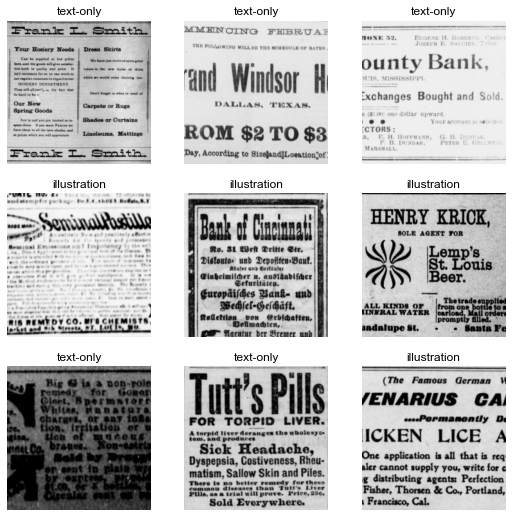

In [ ]:
ad_data.show_batch()

You can see here that the labels have been associated correctly with the labels we want to classify these images into, in this case ```text-only``` and ```illustration```. This is a useful way of checking that your labels and data have been loaded correctly. 

### Creating the model

Now that fastai knows how to load the data the next step is to create a model which will be trained on this data. To create a model suitable for computer vision we will use a function `cnn_learner`. To use this function you need to pass (at a minimum):

- the data the model will use as training data 
- the type of model architecture you want to use 

This is already sufficient for creating a computer vision model in fastai but you will usually also want to pass some metrics you want to track during training. This will allow you to get a better sense of how well your model is performing on the task you are training it on. In this example we'll use `accuracy` at the metric. 

Let's create this model and assign it to a new variable `learn`

In [ ]:
learn = cnn_learner(ad_data, # the data the model will be trained on
                    resnet18, # the type of model we want to use 
                    metrics=accuracy # the metrics to track
                   )

### Training the model 
Although we have created a `cnn_learner` model, we haven't actually trained the model yet. This is done using a `fit` method. There are different ways we can now train (fit) this model. To start with, we'll use the```fine_tune``` method. In this example the only thing we'll pass to the fine tune method is the number of epochs to train the model for. The amount of time the model takes to train will depend on where you are running this code and the resources available. Again, we will cover the details of all of these components below!

In [ ]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.814347,0.855991,0.707792,00:23


epoch,train_loss,valid_loss,accuracy,time
0,0.654051,0.668190,0.792208,00:23
1,0.569322,0.593082,0.772727,00:22
2,0.497258,0.530699,0.779221,00:22
3,0.453548,0.390797,0.863636,00:23
4,0.393648,0.361346,0.883117,00:22
5,0.343122,0.222426,0.902597,00:23
6,0.311713,0.184863,0.896104,00:22
7,0.285388,0.190876,0.922078,00:23
8,0.253056,0.199148,0.915584,00:23
9,0.239470,0.201404,0.915584,00:22


When you run this method you will see a progress bar showing how long the model has been training and the estimated remaining time, alongside a table which displays some other information about the model, this includes our tracked metric, accuracy. You can see that in this example we got an accuracy ~90%. When you run the code yourself the score you get will be slightly different. If you carry out training on a GPU the training time should be less than five minutes. This hopefully already begins to demonstrate that the amount of data (616 example images) and the training time required is not as high as is often assumed. 

# Computer vision using deep learning

Now that we have an overview of the process we'll go into more detail about how this process works.

## Workflow for a supervised computer vision problem 
This section will start to dig into some of the steps involved in the process of creating a deep learning based computer vision model. This process involves a range of steps, only some of which are directly about training models. A high level illustration of a supervised machine learning pipeline might look like this. 
<img src="figs_deeplearning/simple-ml-flow.png">

We can see that there are quite a few steps before and after the training the model part. Before we get to the stage of training a model we will need data. In this lesson data has already been prepared but it is likely that there will usually not be a dataset that helps you tackle your problem exactly. As a result you will usually have to create this data yourself. 
- historical collections (bulk access not always simple)
- choosing labels and creating them 
- train a model
- check the results and either use results for 'automation' or directly for historical interpretation 

## Training a model

Zooming in on the deep learning part of the workflow, what does the training process look like? 

<img src="figs_deeplearning/training-loop.png"> 

The high level summary of the training loop for supervised learning; start with some images and labels, do some preparation to make the input suitable for a deep learning model, pass the data through the model, make predictions for the labels, calculate how wrong the predictions are (the loss), update the model with the aim of generating better predictions next time. This process is repeated a number of times. During this training loop metrics are reported which let the human training the model evaluate how well the model is doing.

This is obviously a very high-level summary. Lets look at each step in the training loop, step-by-step. The next section will show these steps using code so don't worry to much if it doesn't all sink in during this section. 

### Input data

Starting with the inputs to the model, we have images and labels. Although deep learning takes some inspiration from how human cognition works, the way a computer 'sees' is very different to a human. All deep learning models take numbers as inputs. Since images are stored on a computer as a matrix of pixel values, this process is relatively simple for computer vision models. Alongside these images we have label(s) associated with each image, again these are represented as numbers inside the model. 

#### How much data do you need?
It is often believed that you need huge amounts of data to train a useful deep-learning model, however this is not always the case. We assume that if you are trying to use deep learning to solve a problem, you have enough data to justify not using a manual approach. The real problem is usually about the amount of labeled data you have. It is not possible to give a definitive answer, since the amount of training data required is dependent on a broad range of factors. There are a number of things which can be done to reduce the amount of training data required some of which we will cover in this lesson. 

The best approach will likely be to create some initial training data and see how well your model does on this. This will help give you a sense of whether a problem is going to be possible to tackle, and the process of annotating your data is valuable in itself. 

#### Preparing a batch
Usually when we use deep learning it is not possible to pass all of your data into the model in one go. Instead data is split into batches which contain a subset of the data. When using a GPU data is usually loaded into GPU memory one batch at a time. The size of this batch can have some impact on the training process but often the size of your batch is determined by the computational resources you have available, and the size of your images. 

The reason we use a GPU for training our model is that it will almost always be much quicker to train a model on a [GPU](https://en.wikipedia.org/wiki/Graphics_processing_unit) compared to a [CPU](https://en.wikipedia.org/wiki/Central_processing_unit). The reason for this is that a GPU is able to perform may calculation in parallel. As a result GPUs can be much faster for doing computation which requires many parallel calculations which includes training deep learning models. 

Before we can create a batch and load it onto the GPU we usually need to make sure the images are all the same size. This allows the GPU to run operations in parallel effectively. 
Once a batch has been prepared we may want to do some additional transformations on our images to reduce the amount of training data required. We will cover some of these in more detail below.

### create a model 

Once we have prepared data so it can be loaded one batch at a time we pass it to our model. We already saw one example of a model in our first example `resnet18`. A deep learning model architecture defines how data and labels are passed through a mode, In this lesson we focus on a subset of deep learning model called convolutional neural network (CNN). 

![](https://upload.wikimedia.org/wikipedia/commons/6/63/Typical_cnn.png)

This diagram gives an overview of the different components of a CNN model. In this type of model an image is passed through a number of layers (feature maps), before predicting an output label for the image. The layers of this model are updated during training so that they "learn" which features of an image predict a particular label. So far example, when the CNN we trained on adverts will update the parameters known as "weights" for each layer which produces a representation of the image that is useful for predicting whether an advert has an illustration or not. The power in CNNs and deep learning is that these layers are capable of representing very complicated types of data.[^5] The challenge on a practical level is updating these weights effectively. 

#### Using an existing model? 

When considering how to create our model we have various options about what model to use. One option is to use an existing model which has already been trained on a particular task. You might for example use the [YOLO](https://pjreddie.com/darknet/yolo/) model. This model is trained to predict bounding boxes for around a number of different types of object an image. Although this could be a valid starting point there are a number of limitations to this approach for working with historical material, or for humanities questions. Firstly the data these models are trained on might be very different from the data you are using. This can impact the performance on this model on your data, and result in biases towards images in your data which are most similar to the training data used to train your model. Another issue is that if you use an existing model without any modification you are restricted to identifying the labels that the original model was trained on. 

Alternatively you might start from scratch with a new model. Although it is possible to directly define a CNN model yourself by defining the layers you want your model architecture to include, this is usually not where you would start. Whilst these models can work quite well it is often best to start with an existing model architecture. The development of new model architectures is an active areas of research with models proving to be well suited for a range of tasks and data. These models are often then incorporated into deep learning frameworks. Often we want a balance between starting from scratch and leveraging existing models. In this lesson we show an approach which uses existing model architectures but modifies the model slightly to allow it to predict new labels. This model is then trained on new example data so it becomes more suited to task we want it to perform. This is an technique known as 'transfer learning' which will be explore further in this lesson. 

## Training 
- batch
- epochs
- learning rate 
- starting weights (pre-trained models) 
- which layers do we train?

#### prediction x -> y 
- last layer of the model -> classification pushes into one of $c$ classes
- loss function - tells model how wrong the model is 
- update weights 
- metrics for a human 

### validation data
- metrics and validation data

## What is special about deep learning? Lite theory + meandering prose
- neural networks
- deep representations 
- capture things which 'shallow' models wouldn't capture 


## Transfer learning 

In our first model for training a classifier to classify ads we used the `fine_tune()` method on our `learner` to train our model. What was this doing? You will have seen that the progress bar output showed two parts. The first epoch was training only the final layers of the model, after this the lower layers of the model were also trained. This is one way in which we can do transfer learning in fastai. The importance of transfer learning has already been briefly discussed in the previous sections. As a reminder transfer learning uses the 'weights' that a model has previously learned on another task on a new task. In the case of image classification this usually means a model has previously been trained on a much larger dataset. Often this previous training dataset is ["ImageNet"](http://image-net.org/). 

ImageNet is a large database of images which is heavily used in Computer Vision research. ImageNet currently contains ["14,197,122" images](http://image-net.org/), for over 20,000 different classes. The labels for ImageNet are drawn from [WordNet](https://wordnet.princeton.edu/). This dataset is often used as a [benchmark](https://dawn.cs.stanford.edu/benchmark/ImageNet/train.html) for computer vision researchers to compare their approaches. Although ImageNet is very useful there are a number of issues with this dataset. 

One issue is that because the labels are drawn from WordNet, ["a lexical database of semantic relations between words"](https://en.wikipedia.org/wiki/WordNet) which includes words which are not easily translatable directly to images. For example ["how do you know whether a person is a philanthropist from images?"](http://image-net.org/update-sep-17-2019) These labels also included racist, sexist and homophobic labels or label hierarchies. This is explore more fully in https://www.excavating.ai/. The creators are of ImageNet are actively working on this dataset to try to address these problems with the dataset. Despite these problems with ImageNet using a model which has been pre-trained is usually a good idea. 

### A non-scientific experiment to see if transfer learning helps 

Deep learning is a relatively new area of research, with best practices updating frequently. It is therefore important to do small experiments to see what works. This is also very useful for learning more about how deep learning works. As an example of this, let's 'test' to see if transfer learning was actually helpful for training to classify whether 19th century newspaper adverts contained images or not. To do this we'll create a new `learner` with the same parameters as before but with the `pretrained` flag set to `False`. We'll store this in a variable `learn_random_start`.

In [ ]:
learn_random_start = cnn_learner(ad_data, resnet18, metrics=accuracy, pretrained=False)

Now we have created a new learner we'll use the same `fine_fune` method as before and train for the same number of `epochs` as we used last time around.

In [ ]:
learn_random_start.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.227844,0.889729,0.493506,00:23


epoch,train_loss,valid_loss,accuracy,time
0,1.058528,0.673364,0.603896,00:22
1,0.988802,0.830516,0.577922,00:23
2,0.995819,0.952357,0.655844,00:22
3,0.958861,0.840247,0.694805,00:23
4,0.926522,0.665514,0.714286,00:23
5,0.901013,0.666175,0.720779,00:22
6,0.865229,0.674955,0.720779,00:24
7,0.825539,0.633719,0.694805,00:22
8,0.809519,0.599780,0.720779,00:22
9,0.775249,0.597183,0.714286,00:23


This best score we get when we randomly initialise the weights for the model is ~70% accuracy. In comparison if we go back to our original model, which is stored in a variable `learn`, and use the ```validate()``` method,  we get the metrics (in this case accuracy) calculated on the validation set:

In [ ]:
learn.validate()

(#2) [0.20140400528907776,0.9155844449996948]

We can see that there is a fairly big difference between the two models performance. We kept everything the same except changing the `pretrained`flag to ```False```. This flag determines if the model start from the weights learned from training on ImageNet
, or if the model instead starts from 'random' weights.[^3] This was of course not a proper proof[^2] that transfer learning works but suggests in this example it is probably a sensible default for us to use. 

### Why does transfer learning often help?

As we have seen transfer learning works by using a model trained on one task, on a new task. In our example using a model trained on ImageNet to classify images of digitized 19th Newspapers. It might seem strange that transfer learning works in this case since the images we are training our model on are very different from the images in ImageNet. Although ImageNet does have a [category for newspapers](http://www.image-net.org/synset?wnid=n06267145#) these largely consist of images of newspapers in everyday settings rather than images cropped from newspapers. So why is using a model trained on ImageNet still useful for a task which has different labels and images to those in ImageNet?

When we looked at the diagram of a CNN model we saw that it is made of different layers, also known as feature maps. These layers create representations of the input image which pick up on particular features of an image which are useful for predicting a label. What are these features? Various techniques have been developed to help visualize the different layers of a neural network. These techniques have found that the earlier layers in a neural network tend to learn more 'basic' features, for example they learn to detect basic shapes like circles, or lines, whilst layers further into the network contain filters which encode more complex visual features, for example eyes. Since many of these features, capture visual properties which will be helpful for many tasks, starting with a model that is already capable of detecting features in images will help the model detect features which are important for the new task, since these new features are likely to be a variant on the features the model already knows rather than completely new features. !todo cite: https://arxiv.org/pdf/1311.2901.pdf

When a model is created in fastai using the `cnn_learner` method an existing model architecture is used as the "body" of the model and a few additional layers are added to the end of the model the "head". The body part of the model, by default uses the weights learned through training on ImageNet. The "head" part of the model adds a few additional layers, which take the output of the body as input before moving to a final layer which is created to fit the training data you pass to `cnn_learner`. The `fine_tune` method first trains only the head part of the model i.e. the final few layers of the model, before 'unfreezing' the lower layers. When these layers are 'unfrozen' the weights of the model are updated through the process discussed above under 'training'. We can also take more active control of how much we train different layers of the model, something we will see as we move through a full pipeline of training a deep-learning model. 

# A full pipeline

This next section will move through the steps involved in creating a deep learning model, starting from exploring the data, to training the model. This will reinforce some of the concepts that have been discussed in the previous section. 

## The Data

We will again work with the 'newspaper navigator' dataset, however this time the images will be those predicted as being photos. These photos are sampled from 1895 to 1920. A jupyter notebook is available which shows the steps involved in preparing this data.  !todo add notebook preparing sample and labels. 

- how much data?
- balance in the labels 
- validation/training split

### Multi-label classification 

So far we looked at using computer vision to create a model which classifies images into one of two categories. Whilst we can create a model which classifies images into a larger number of categories, and alternative approach to classifying images into a single category, is to assign labels to the images. Using this approach of applying labels allows an image be associated with more than one label, or to have no labels. 

Depending on how you want to apply computer vision classification or labels might be more suitable. The data you are working with will also partially determine whether it is possible to asssign images to a single category or not. Classifying adverts into two categories of 'illustrated' or 'not illustrated' was relatively easy. There were some 'edge cases', for example adverts which contained [manicules](https://en.wikipedia.org/wiki/Index_(typography), these could be considered as a form of typography and therfore not an illustration. However, it would also not be unreasanble to argue that they play a differened intended -  or actual - role in communicating information compared to other typography, and thefore should be classed as an illustration. We can see alread that even in this relatively simple clasification example the potential limitations of classifying images. 

Applying labels, offers some advantages in this regard, since these labels can operate independetly of each other, it is possible for an image to have label 1, without that implying that image isn't also label 2. Another potential benefit over classification is that a classification model will always predict one of the categories for any image it sees. It may be less confident about this prediction but because of the way in which classification models work they will always predict one category as the most likely. For example, a classifier trained to classify images of 'dogs' or 'cats' will always assign one of these labels to an image it is asked to predict. It will not assign a 'I'm not sure' or 'there are no dogs or cats in this picture' label. If you have a good sense of what your whole corpus will contain this will not be as much of a problem and for some use cases assigning an image to single category which is mutually exclusive of other labels will be helpful. 

The consideration of classification vs labelling, should be considered in relation to the role your model has. It is important to remember that a model makes predictions, there is then a second step of deciding what action (if any) to make based on those predictions. 




Labels 
- more flexible 
- could be difficult to get enough labels 
- can deal with unseen categories better 
- may be more suitable for encoding concepts that humanities researchers would want to explore 
- you can control how aggressively to apply your labels

categories 
- you get a category for everything 
- can be simpler to annotate 
- it is possible to use different models for different categories

!todo appendix section on technical differences?
!todo Multi-label vs classification for historical analysis 

## Looking at the data (EDA)

It is important to understand our data before trying to use it for deep learning, so we'll start by loading the data into a pandas `DataFrame`, [pandas](https://pandas.pydata.org/) is a Python library which is useful for working with tabular data. Since this isn't a tutorial on `pandas` don't worry if you don't follow all of the pandas code in the below section fully. The aim here is just to take a look at some of the features of this dataset. 

<div class="alert alert-warning">
   Although it's not necessary to be familiar with pandas to follow this lesson, becoming familiar with pandas can be very useful for deep learning because it allows you to efficiently work with tabular data, which will often include training data for deep learning models. Some suggested resources are includes at the end of this lesson. 
</div>

First we import the pandas library, by convention, pandas is usually imported as `pd`. 

In [ ]:
import pandas as pd

For this dataset or labels are stored in a csv file again. Let's load it into a `DataFrame` stored in a variable `df`, this is a standard convention used for naming pandas `DataFrames`.

In [ ]:
df = pd.read_csv('photo_data/multi_label.csv',na_filter=False)

Let's now take a look at what the dataframe looks like. Remember, when working in a Jupyter notebook, we don't need to use print to display variables which are on the last line of our code block. 

In [ ]:
df

,file,label
0,vi_yes_ver01_data_sn84025841_00175032307_1897052901_0309_023_0_91.jpg,human|landscape
1,dlc_frontier_ver01_data_sn84026749_00280764346_1916082001_0811_007_0_94.jpg,human
2,wa_dogwood_ver01_data_sn88085187_00211108150_1909052901_1054_013_0_96.jpg,human
3,hihouml_cardinal_ver01_data_sn83025121_00294552479_1903101601_0500_008_0_91.jpg,human
4,ct_cedar_ver01_data_sn84020358_00271744456_1905051301_1034_008_0_95.jpg,human
...,...,...
1997,ak_jellymoss_ver01_data_sn84020657_0027952701A_1918021901_0344_008_0_95.jpg,human|human-structure
1998,njr_cinnamon_ver03_data_sn85035720_00279529571_1911090202_0640_013_0_94.jpg,human
1999,dlc_liberia_ver01_data_sn83030214_00175041394_1906033101_0608_006_0_99.jpg,human
2000,uuml_dantley_ver01_data_sn85058130_206534618_1897031001_0645_002_0_94.jpg,human


By default, pandas will display a sample of the `DataFrame`. We can already learn a few things about our data. Firstly, we have `2002` rows. This is the maximum size of our potential training + validation datasets. We can also see three columns, the first is a pandas [`Index`](https://pandas.pydata.org/pandas-docs/stable/reference/indexing.html), the second column is the path to the image files, the third is the labels column. 

It is useful to explore the properties of a dataset before using it to train a model. If you created the annotations for the dataset you will likely already have a sense of the structure of the data but it is still useful to empirically validate this. We can start by looking at the label values. In pandas we can do this with the ```value_counts()``` method on a Pandas Series (i.e. a column) to get the counts for each value in that column. 

In [ ]:
df['label'].value_counts()

human                                     1363
human-structure                            164
                                           117
human|human-structure                      106
human-structure|landscape                   48
human|landscape                             40
landscape                                   40
animal                                      26
human|animal|landscape                      26
human|human-structure|landscape             20
human|animal                                19
human|animal|human-structure                16
animal|human-structure                       8
animal|landscape                             4
animal|human-structure|landscape             3
human|animal|human-structure|landscape       2
Name: label, dtype: int64

This is a start but we can see that because the labels for each image are stored in the same column with a `|` separator we don't get the proper number of label counts. Here, instead, we see the combinations of labels. Human is often a single label, and human/human-structure are often together. What we really want though is to see how often each labels appears. First lets export the label column from the Pandas `DataFrame` to a Python `list`. We can do by indexing into the Pandas column for labels, and then using the [`to_list()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.to_list.html?highlight=to_list#pandas.Series.to_list) pandas method to convert the Pandas column to a list. 

Once we've done this we can take a slice from this list to display a few examples. 

In [ ]:
labels = df['label'].to_list() # create a variable lables to store the list
labels[:6] # take a slice of this list to display

['human|landscape', 'human', 'human', 'human', 'human', 'human']

Now we have the labels in a list we still have items in the list such as ```'human|animal|human-structure'``` which include mutliple labels. We need to split on the `|` symbol to access each label. There are various ways of doing this. We'll tackle this using a [list comprehension](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions). If you haven't come across list comprehension before, it is similar to a `for loop` but it can be used to directly create or modify a python list and is often faster than using a for loop and appending to a list. We'll create a new variable `split_labels` to store the new list.

In [ ]:
split_labels = [label.split("|") for label in labels] # for each label in the list split on "|"

Let's see what this look like now by taking a slice of the list

In [ ]:
split_labels[:4]

[['human', 'landscape'], ['human'], ['human'], ['human']]

We now have all of the labels split out into individual parts. However, because the python [```split```](https://docs.python.org/3.8/library/stdtypes.html?highlight=split#str.split) method returns a list we have a list of lists. We could take this in a number of ways but a concise way below uses the `toolz` python [library](https://github.com/pytoolz/toolz) to deal with this and also return the frequencies for each of our labels. 

In [ ]:
from toolz import itertoolz, pipe
label_freqs = pipe(split_labels,itertoolz.concat, itertoolz.frequencies)

What does this code above do? The `toolz` library provides various utility functions, including for working with iterables in Python (which includes lists). The ```pipe``` function works in a similar way to the `|` in Unix, which you may have seen used on the command line. It takes something as input, in this case our `split_labels` list, and then passes it through a range of consecutive functions. In the above code these functions are `itertoolz.concact` which concatenates the values in the `split_labels` python `list`, including those contained with sublists, this output is then passed to the `itertoolz.frequencies` function. As the name suggests, this returns the frequencies of the values passed to this function.  This is returned as a python `dictionary`. The use of `pipe` here isn't necessary but it can make it clearer what is happening when you have a pipeline of data transformations like this since the code can be read from left to right. 

We now have our label frequencies stored as a python `dictionary`.

In [ ]:
label_freqs

{'human': 1592,
 'landscape': 183,
 'human-structure': 367,
 '': 117,
 'animal': 104}

We can also see how many total labels we have in this dataset. We can do this be accessing the `values` attribute of our dictionary by using `values()` and using `sum` to count the total. 

In [ ]:
sum(label_freqs.values())

2363

Although we have a sense of the labels already, visualizing the labels may help us understand their distribution more easily. We can very quickly plot these values using the `matplotlib` python library to plot a bar chart. 

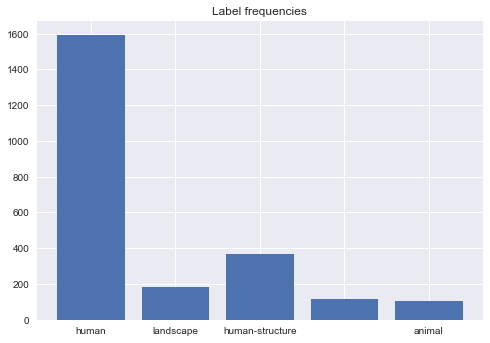

In [ ]:
import matplotlib.pyplot as plt
plt.bar(label_freqs.keys(), label_freqs.values()) # We pass our labels and values to matplotlib
plt.title('Label frequencies') # add a title to the plot
plt.show() # show the plot

### What to do with these labels?

This plot helps show the balance between the different labels, including some photos which have no labels (this is the bar with no label). This dataset poses a few new challenges for us. Firstly we might be concerned that the model will become much better at predicting humans in comparison to the other labels, since there many more examples of that for the model to learn from. Another challenge is how to evaluate the success of this model, or which metric should we use?

### Choosing a metric  

In our previous ad classification dataset `accuracy` was used as a measure. Accuracy can be shown as $Accuracy = \frac{\text{Correct Predictions}}{\text{Total Predictions}}$. Accuracy, is an intuitive metric, since it shows the proportion of correct predictions compared to the total number of predictions. For this reason it often a useful first metric to consider. However there are limitations to using accuracy. In our previous dataset we had two classes with a balance between labels[^4] with the same number of example for each label i.e 50% ads with images 50% ads with no image. In this example we could reasonably say then that if you predicted randomly, you would have an accuracy of around 50%. However if the dataset is not evenly balanced between labels, this is no longer true. 

As an extreme example, take a hypothetical dataset with a 100 data points, with label $A$ for 99 and label $B$ for 1. For this dataset always predicting label $A$ would result in an accuracy of 99% ($99/100$). An accuracy metric in this example is not very useful since our model isn't at all good at predicting label $B$, yet we still get an accuracy of 99% which sounds very good. Depending on the labels you are interested in, it is possible that they will be relatively 'rare' in your dataset. It is therefore important to be aware of the limitations of using accuracy as a metric for all datasets. Fortunately, there are other metrics which can help overcome this potential limitation of using accuracy. 

### F-Beta 

The issues we identified with accuracy as a metric, was that it could hide how well a model is performing for imbalanced datasets, in particular it doesn't provide information on two particular things we might care about, precision and recall. 

Precision is the ratio of correct positive predictions to the total number of positive predictions, which can be shown as:

$Precision = \frac{\text{True Positives}}{\text{True Positives + False Positives}}$

Recall is the ratio of correct positive predictions to the total number of positive examples in the dataset, which can be shown as:

$recall = \frac{\text{True Positives}}{\text{True Positives + False Negatives}}$ 

As you may have noticed, precision is a measure of how precisely a model is i.e. it 'penalized' for making extra wrong guesses. On the other hand recall measures how much a model misses i.e. it is 'penalized' for missing labels. How much we care about each of these depends on our data and how we want to use the model. We can see how in some settings we may care more about recall than precision and having these two measures available allows us to favor one or the other. If we care about some compromise between the two i.e. a model that makes too many wrong guesses or misses to many things, we could use F-Beta measure (sometimes shown as $F\beta$). The F-Beta score is the weighted [harmonic mean](https://en.wikipedia.org/wiki/Harmonic_mean) of precision and recall. The best possible F-beta score is 1, the worse 0. The Beta part of Beta is a weighting which can be used to give more weight to precision or recall. A Beta value <1 will give more weight to precision, whilst a weighting > 1 will give more weight to recall. An even weighting of these two is often used i.e. a Beta of 1. This score is often also referred to as the "F-score" or "F-measure". This is the measure we will use for our new dataset.


<div class="alert alert-warning">
Remember, metrics don't directly impact the training process. The metric gives the human training the model feedback on how well it is doing but isn't used by the model to update the model weights. 
</div>

## Loading data 

Now that we have a better understanding of the data, we'll move to the next step, loading the data in a form that a deep learning model (in this case a computer vision model) can understand. The process of loading data for deep learning ranges from a very straightforward step, to something which can be quite complicated. 
fastai provides a number of useful APIs for loading data. These APIs move from a 'high' level API which provides useful 'factory methods', to a 'mid-level' and 'low-level' APIs which offer more flexibility in how data is loaded. 


### fastai Dataloaders
- factory methods for some data types and sources
- what is a dataloader?
- how to use with df?

For our last dataset we loaded our data from a `csv` file using the `.from_csv()` method. Since we have our data loaded into a pandas `DataFrame` we'll look at how to load data using a `DataFrame` instead. As a reminder the format of the `DataFrame` is as follows:

In [ ]:
df.head(1)

,file,label
0,vi_yes_ver01_data_sn84025841_00175032307_1897052901_0309_023_0_91.jpg,human|landscape


The code for loading from a `DataFrame` is fairly similar to the method we looked at before. There are a few additional things we need to specify to load this data. The code is commented to show what each line is for. 

In [ ]:
photo_data = ImageDataLoaders.from_df( 
    df, # the dataframe where our labels and image file paths are stored
    folder="photo_data/images", # the path to the directory holding the images
    bs=32, # the batch size (number of images + labels)
    label_delim="|", # the deliminator between each label in our label column
    item_tfms=Resize(224), # resize each image to 224x224 
    valid_pct=0.3, # use 30% of the data as validation data
    seed=42, # set a seed to make results more reproducible 
)

Now we have create our `DataLoaders` lets see what it looks like

In [ ]:
photo_data

look at the data

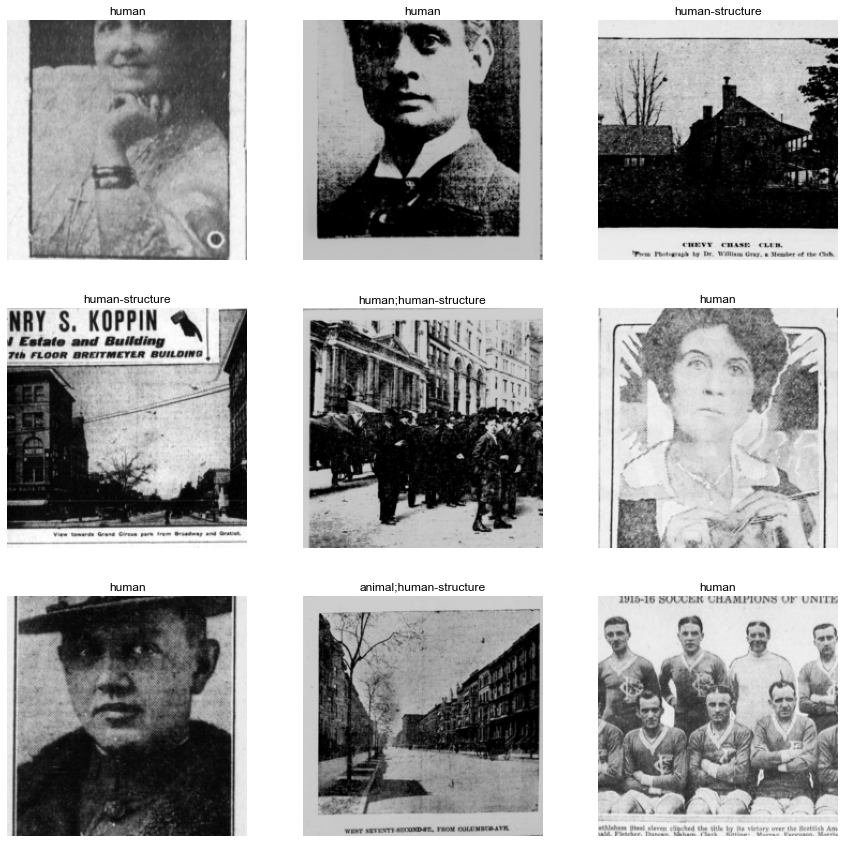

In [ ]:
photo_data.show_batch(figsize=(15,15))

### Inspecting model inputs
- what does the input look like
- what tricks can we use augment the data

The `show_batch()` method is useful for giving a view of our data but it can also be useful to directly see which labels our data contains. We can do this by accessing the `vocab` attribute of our data.

In [ ]:
photo_data.vocab

(#4) ['animal','human','human-structure','landscape']

We can see here that we have the four labels we expect inside of the vocab

#### what do these both look like?
As was mentioned previously machines use the underlying numerical representation of images, rather than 'seeing' images in the same way as a human. We also saw in the outline of the training process that model training usually happens in `batches`. When `photo_data` was created above `bs=32` was specified. We can access a single batch in fastai using `one_batch()`. We'll use this to inspect what the model gets as input. 

Since our data is made up of two parts; the input images, and the labels, so `one_batch()` will return two things. We will store these in `x` and `y`

In [ ]:
x, y = photo_data.one_batch()

<div class="alert alert-warning">
    When you learned Python, you were likely told to use meaningful variable names. 'x' and 'y' variable names seem to be the opposite of this. This is usually a very sensible approach, however, within particular disciplines standard conventions are adopted. In machine learning 'x' is commonly understood as the input data and 'y' the target labels to be predicted.
</div>

We can start by checking what `type` x and y are. We can do this using the Python `type()` function. 

In [ ]:
type(x), type(y)

(fastai.torch_core.TensorImage, fastai.torch_core.TensorMultiCategory)

These types will likely not be ones you have seen before, but we see that the x type is `TensorImage` and y is `TensorMultiCategory` both of these sound reasonable given the data and labels we have. We can explore these in more detail to inspect what both of these `Tensors` look like 

To start we can take a look at the length of both x and y:

In [ ]:
len(x), len(y)

(32, 32)

If you remember our batch size was 32 so this is what we'd expect. Let's take a look at a single example from that batch. We can use the standard python indexing to the access the first element of `x`

In [ ]:
x[0]

tensor([[[0.9294, 0.9373, 0.9333,  ..., 0.5333, 0.8863, 0.9333],
         [0.9216, 0.9294, 0.9294,  ..., 0.5020, 0.8824, 0.9255],
         [0.9294, 0.9333, 0.9294,  ..., 0.4980, 0.8941, 0.9373],
         ...,
         [0.6784, 0.8980, 0.9216,  ..., 0.9216, 0.8471, 0.5098],
         [0.6706, 0.8980, 0.9294,  ..., 0.9137, 0.8235, 0.4863],
         [0.7098, 0.9176, 0.9294,  ..., 0.9020, 0.8039, 0.3647]],

        [[0.9294, 0.9373, 0.9333,  ..., 0.5333, 0.8863, 0.9333],
         [0.9216, 0.9294, 0.9294,  ..., 0.5020, 0.8824, 0.9255],
         [0.9294, 0.9333, 0.9294,  ..., 0.4980, 0.8941, 0.9373],
         ...,
         [0.6784, 0.8980, 0.9216,  ..., 0.9216, 0.8471, 0.5098],
         [0.6706, 0.8980, 0.9294,  ..., 0.9137, 0.8235, 0.4863],
         [0.7098, 0.9176, 0.9294,  ..., 0.9020, 0.8039, 0.3647]],

        [[0.9294, 0.9373, 0.9333,  ..., 0.5333, 0.8863, 0.9333],
         [0.9216, 0.9294, 0.9294,  ..., 0.5020, 0.8824, 0.9255],
         [0.9294, 0.9333, 0.9294,  ..., 0.4980, 0.8941, 0.

This is the first image in our batch in the format in which it will be passed to the model. Since this output isn't very meaningful for us to interpret lets access the `shape` attribute:

In [ ]:
x[0].shape

torch.Size([3, 224, 224])

This output is hopefully more meaningful. The first dimension `3` refers to the number of channels in our image (since the image is an [RGB](https://en.wikipedia.org/wiki/RGB_color_model) image), the other dimensions `224` are the size we specified when we loaded our data `item_tfms=Resize(224)`. Now we have inspected `x`, the input images, we'll take a look at the a `y`. Again we can index into the first `y`

In [ ]:
y[0]

tensor([0., 0., 0., 0.], device='cuda:0')

Again we can see that the first `y` is also a tensor. However, this time it looks quite different. In this example we can easily manually count the number of elements, however, to be sure lets access the `shape` attribute:

In [ ]:
y[0].shape

torch.Size([4])

So we have four elements in our first `y`. These are the 'one hot encoded' labels. This is a way of expressing label where `0` is no label and `1` is true. So in this case we have one the four labels in the vocab present in the label for the first image. Now we can finally take a look at the first batch as a whole

In [ ]:
x.shape, y.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32, 4]))

Again, this can be useful to verify that data looks as you would expect. It is also a useful way of 'poking' around to see how data is prepared for the model. Now we have had a look at what our data looks like, we'll look at some potential ways to maximize our fairly modest dataset. 

## Image Augmentations 


Image augmentations are one of the methods we can use to try to reduce the amount of training data required and prevent overfitting our model. As a reminder overfitting occurs when the model gets very good at predicting on the training data but doesn't generalise well to the validation data. Image augmentations are a method of artificially creating more training data. Looking at an example will help illustrate how this works.

In [ ]:
tfms = aug_transforms()
photo_data = ImageDataLoaders.from_df(
    df,
    folder="photo_data/images",
    bs=32,
    label_delim="|",
    item_tfms=Resize(),
    batch_tfms=[*tfms],
    valid_pct=0.3,
    seed=42
)

In this example we use a function `aug_transforms` to create some image transformations. We pass this into the `batch_tfms` parameter in the `ImageDataLoader`. We previously saw `item_tfms` in our advert data loading example. What is the difference between these two transforms? `item_tfms` as the name might suggests, are applied to each item before they are assembled into a batch. `batch_tfms` are instead applied to batches of images, in our case 32 images at a time. The reason we should try and use `batch_tfms` when possible, is that they happen on the GPU and as a result our much faster. If you don't have a GPU available they will still work though. 

Now we have passed some augmentations to our data, we should take a look at what the data looks like. Since we are now concerned with what the transformation look like, it will be easier to compare if we look at the same image. We can do this by passing the `unique=True` flag to `show_batch()`

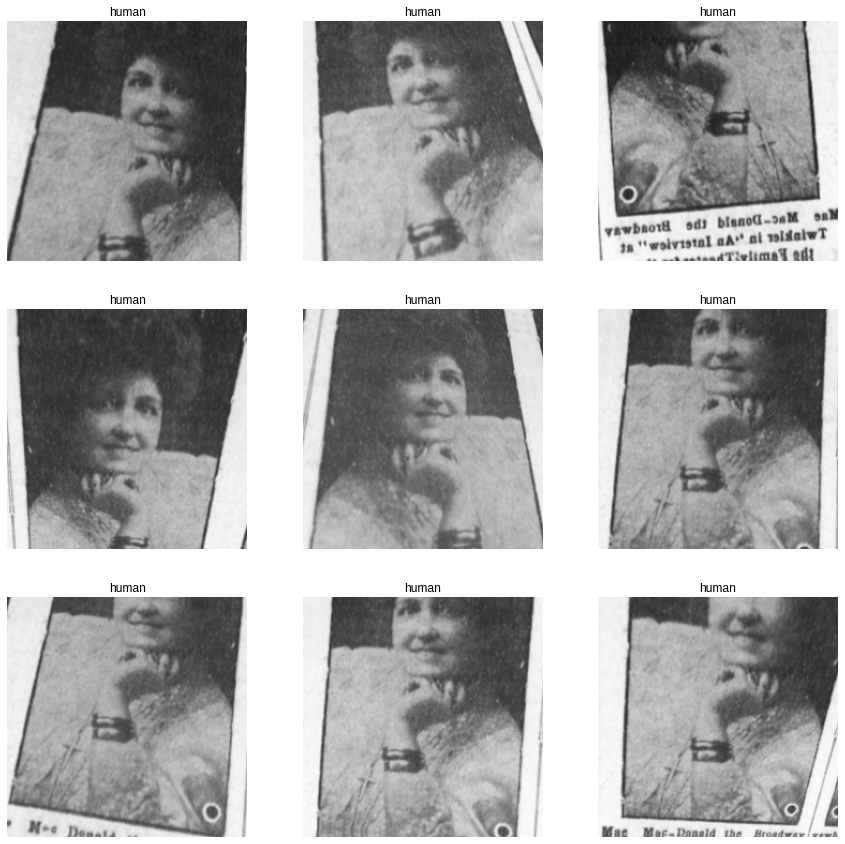

In [ ]:
photo_data.show_batch(unique=True, figsize=(15,15))

The same image has now been transformed in various ways. 

- what the intuition is here
- what is the problem with using default transforms on digitised heritage content?

In [ ]:
doc(aug_transforms)

aug_transforms(mult=1.0, do_flip=True, flip_vert=False, max_rotate=10.0, min_zoom=1.0, max_zoom=1.1, max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75, xtra_tfms=None, size=None, mode='bilinear', pad_mode='reflection', align_corners=True, batch=False, min_scale=1.0)
Utility func to easily create a list of flip, rotate, zoom, warp, lighting transforms.

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


choosing transforms that work with our material 
- resize on the gpu

In [ ]:
tfms = aug_transforms(max_rotate=30.0,max_zoom=1.0, max_lighting=0.2, max_warp=0.0, size=224)

In [ ]:
photo_data = ImageDataLoaders.from_df(
    df,
    folder="photo_data/images",
    bs=32,
    label_delim="|",
    item_tfms=Resize(500),
    batch_tfms=[*tfms],
    valid_pct=0.3,
    seed=42
)

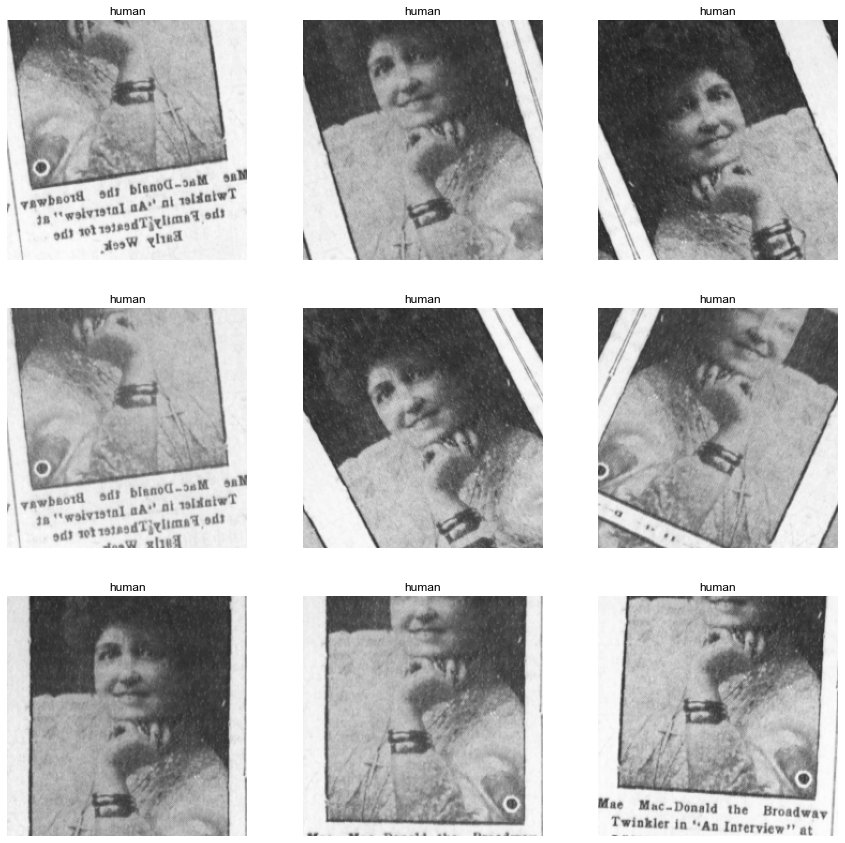

In [ ]:
photo_data.show_batch(unique=True, figsize=(15,15))

## Creating a model


model - we use a different model type 
metrics - f1 needs te instantiated ! look out for capitals 
need mutli metrics
add accuracy as a comparison to show how different metrics can be for the same data


In [ ]:
learn = cnn_learner(photo_data, densenet121, metrics=[F1ScoreMulti(), accuracy_multi])

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


what is this learn thing?

In [ ]:
learn

## train the model

In [ ]:
# fining a good learning rate

SuggestedLRs(lr_min=0.014454397559165954, lr_steep=9.12010818865383e-07)

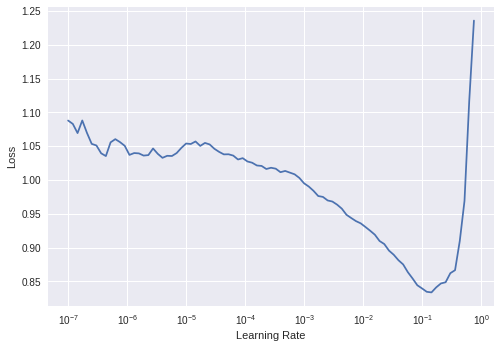

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(5, lr_max=1e-2)

epoch,train_loss,valid_loss,f1_score,accuracy_multi,time
0,0.752449,0.333945,0.503750,0.876667,01:29
1,0.457052,0.262725,0.528806,0.909167,01:29
2,0.338278,0.238379,0.651312,0.903333,01:27
3,0.264861,0.199290,0.650978,0.922500,01:28
4,0.209619,0.192052,0.668117,0.925833,01:28


loss valid vs training reminder

saving intermediate results 

In [ ]:
learn.save('stage_1')

unfreeze? what and how

SuggestedLRs(lr_min=6.918309736647643e-07, lr_steep=4.786300905834651e-06)

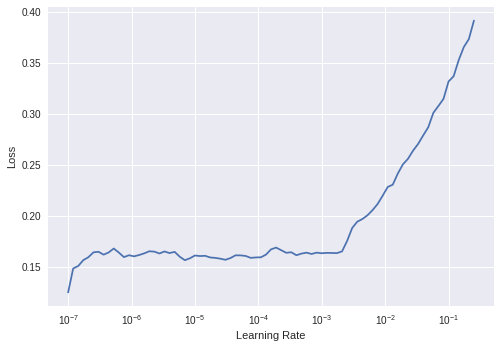

In [ ]:
learn.unfreeze()
learn.lr_find()

using callbacks to save the model 

In [ ]:
learn.fit_one_cycle(4, lr_max=slice(1e-7, 1e-4), cbs=[SaveModelCallback(monitor='f1_score')])

epoch,train_loss,valid_loss,f1_score,accuracy_multi,time
0,0.178716,0.199612,0.658940,0.921667,01:30
1,0.164591,0.193451,0.658547,0.922500,01:29
2,0.164867,0.190896,0.680938,0.927917,01:29
3,0.160693,0.191802,0.676866,0.925417,01:43


Better model found at epoch 0 with f1_score value: 0.6589398317851576.
Better model found at epoch 2 with f1_score value: 0.6809378327654568.


In [ ]:
going back to previous results

In [ ]:
#learn.load('stage_1')

# interpretation of results 

how did we do?
inspecting the results in more detail 

In [ ]:
y_pred, y_true = learn.get_preds()

using classification report to give more insight 
see whether the model is doing worse on a particular label 

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import classification_report

can access f1 score using sklearn 

In [ ]:
f1_score(y_true, y_pred>0.50, average='macro')

0.6809378327654568

classification report is useful for multi label, will also tell us some more granular details 

In [ ]:
metrics = classification_report(y_true, y_pred>0.50, target_names=photo_data.vocab, zero_division=1)
print(metrics)

                 precision    recall  f1-score   support

         animal       0.82      0.29      0.43        31
          human       0.93      0.94      0.94       481
human-structure       0.75      0.76      0.76       104
      landscape       0.67      0.55      0.60        51

      micro avg       0.88      0.85      0.87       667
      macro avg       0.79      0.64      0.68       667
   weighted avg       0.88      0.85      0.86       667
    samples avg       0.88      0.86      0.86       667



we can also visually inspect some predictions 

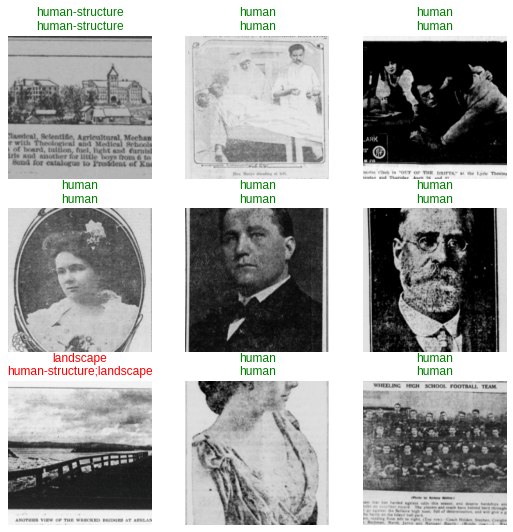

In [ ]:
learn.show_results()

## A more realistic training loop

can see some labels perform worse?

Why is this? 
- number of labels 
- type of label: landscape was fairly poorly defined
- animals?

our pipeline is likely to be iterative, particularly if we control the labels,
inter-annotar agreement, sharing training data, and predictions etc. 

<img src="figs_deeplearning/feedback-loop.png"> 

# Discussion 
Framing in a historical research/humanities context

- other things besides classification/labelling, clustering, similarity, visual search
- generalisability 
- Choosing meaningful labels 
- deep learning as a tool vs something underpinning research claims 
- interprability 
- bias
- pre-trained models vs over-fitting to your task/corpus 

## further resources
- fastai courses
- ethics and ai 
- ai4lam 
- suggestions for data
- annotation tools (approaches )

# Footnotes

[^1]: This is clearly a claim that could be challenged but there is almost always a level of abstraction at which we choose to 'stop' trying to understand all the details. For example, as a user of the Python programming language we may not dig into how Python itself is implemented in the C programming language. If we use deep learning as a 'tool' we want to be sure of how 'correct' our results are, not necessarily exactly why they are correct. 

[^2]: Not a rigours test 

[^3]: This initialisation isn't actually random in the fastai framework, and instead uses [Kaiming initialization](https://pouannes.github.io/blog/initialization/). <!---$std = \sqrt{\frac{2}{\left(1 + a^{2}  \right ) \times \text{input_dimensions}}}$-->

[^4]: This balanced data was generated by upsampling the minority class. The process for doing this is in !todo add link. Normally you probably wouldn't want to start with this approach but it was done here to make the first example easier to understand. 

[^5]: Neural Networks are able to theoretically approximate any function. The mathematical proof of this exists in a number of forms under the heading of the "Universal Approximation theorem"](https://en.wikipedia.org/wiki/Universal_approximation_theorem). These proofs are not things you will need to know to practically use deep learning, however if you are interested a good overview of the idea can be found in a [youtube video](https://youtu.be/Ijqkc7OLenI)  

## Appendix 
!todo decide what lives here?
- data block api

- Loss functions 

- Gradient Descent

- Convolutions (link to other cv lesson) 

- learning a function?


In [ ]:
photo_datablock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=RandomSplitter(0.3),
                   get_x=ColReader(0, pref="photo_data/images/"),
                   get_y=ColReader(1, label_delim='|'),
                   item_tfms=Resize(224),
                   batch_tfms=tfms)

In [ ]:
photo_datablock.summary(df)

Return to more detail of how machine learning works.

- learning from data vs writing the rules  - what does this meean?

## Learning a function 

Essentially what we are doing when we are 'learning' from data is learning a function that, when given an input $x$ will succesfully predict label $y$. As a simple example let's say we want to predict the price $y$ of a book based on how many pages that book had $x$. To keep it simple we can represent this as: 
$y = ax + b$, or in English, the price $y$ of a book can be found by multiplying the number of pages $x$ by $a$ and adding $b$. Let's see an example of this simple relationship plotted. We will use numpy to create an array of numbers for x, and then create y using this x array as input. 

In [ ]:
x = np.array([10, 20, 30, 40])
y = 2*x + 3

Above you can see that the function for determining $y$ is $2x + 3$. We can also plot this relationship between $x$ and $y$ as a plot:

In [ ]:
#hide
plt.title('Price of book in relation to Number of Pages')
plt.xlabel('x: Number of book pages')
plt.ylabel('y: Price of the book')
plt.plot(x,y)

We can see that this function is plotted as a straight line. This function is obviously not a very realistic representation of most data, and it is unlikely that many real world data would be explainable by such a simple function. In reality the data is more likely to look something like this chart.

In [ ]:
#hide
np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 * x + np.random.rand(100, 1)
# plot
plt.scatter(x,y,s=10)
plt.title('Price of book in relation to Number of Pages')
plt.xlabel('x: Number of book pages')
plt.ylabel('y: Price of the book')
plt.show()